### **Quick Tutorial - Machine Learning Models (Linear Regression and Decision Tree Regression) for Residential Appraisers**

*Important Note: There are plenty of free machine learning tutorials and courses online. Anyone can access them, learn, and run predictive models for home values. However, this tutorial has been designed specifically for residential appraisers, and some of the material will be irrelevant or less important for other industries. If you are not a residential appraiser, and/or you are looking to learn about machine learning as a broader field, this tutorial may not be adequate for you.*

The purpose of this tutorial is for residenatial appraisers interested in machine learning to get their toes wet. This is **not** a comprehensive machine learning tutorial and it does **not** cover everything there is to know about the topic. 

In this tutorial we will cover data collection, data wrangling/cleaning, visualizations, data modelling, and predictions. Since real estate prices are continuous numerical variables we will be using regression techniques, **Linear Regression and Decision Tree Regression.**


**Prerequisites:**
1.	Some understanding of Python programming.
2.	Access and familiarity with Google Colabs or Jupyter notebook.
3.	If you want to use your own data you will need access to home sales data and custom exports from your local MLS.


**Obtain the data:**
We will be using a dataset of home sales that includes sales prices and several predicting features, in csv format. 

The easiest way to obtain a dataset for your specific market area is by creating a custom csv export from your local MLS system. If you don’t know how to create it you should get technical support from your MLS provider.

The sales dataset  contains the following features:
Lot size, Water View, Year Built, Bedrooms, Bathrooms, GLA, Garage, Carport, Fireplace, Pool, and Sales Price.
Note: These features are based on the subject’s market area. You should export a dataset that includes all of the value-affecting features you consider relevant for your specific market area. 


**Assumptions:**
We will make the following assumptions for the purpose of this tutorial. 
1.	Stable market condition. In rapidly increasing or decreasing markets you will likely need to add a “sales date” column/feature.
2.	Accurate data sources. MLS data is considered to be good and reliable.
3.	Relevant predicting features. Make sure you include all of the appropriate value-affecting features for the subject’s market area.

### **IMPORT LIBRARIES**

### First we are going to import the libraries we are going to be using.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline


### **IMPORT DATASET**

### The following code will import the dataset to the Colabs/Jupyter notebook. 




In [ ]:
file_path = '/content/Sales_Dataset.csv'    #Create file path to csv dataset 
sales_df = pd.read_csv(file_path)           #Read dataset in dataframe
sales_df.head()                             #Display data (first 5 rows) just to make sure it was successfully imported

,LotSizeSquareFeet,WaterViewYN,YearBuilt,BedroomsTotal,BathroomsFull,BathroomsHalf,LivingArea,GarageSpaces,CarportSpaces,FireplaceYN,PoolPrivateYN,ClosePrice
0,8549,True,2016,5,4,0,4439,3.0,NaN,False,True,675000
1,11108,False,2018,5,4,0,4069,3.0,NaN,False,False,540000
2,9920,False,1999,5,4,0,3834,3.0,NaN,True,True,515000
3,10035,True,1999,5,4,0,3828,3.0,NaN,True,True,495000
4,9600,True,2007,5,4,0,3382,3.0,NaN,False,True,494700


### Every time we modify the dataframe it is a good practice to check a sample of it to confirm the code did what was intended. For this we will use sales_df.head(), which will show the first 5 rows of the dataframe.

### **EXPLORE THE DATA**

### Explore the data to get an idea of the characteristics of the dataset.

In [ ]:
sales_df.describe()       #Get main statistics of the dataset

,LotSizeSquareFeet,YearBuilt,BedroomsTotal,BathroomsFull,BathroomsHalf,LivingArea,GarageSpaces,CarportSpaces,ClosePrice
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,209.000000,7.0,210.000000
mean,8608.233333,2000.538095,3.700000,2.419048,0.095238,2183.052381,4.148325,0.0,306573.128571
std,2779.318027,4.749311,0.641842,0.615291,0.294245,596.492637,26.127498,0.0,71470.906697
min,1684.000000,1993.000000,2.000000,2.000000,0.000000,1191.000000,2.000000,0.0,167850.000000
25%,6577.500000,1997.000000,3.000000,2.000000,0.000000,1805.750000,2.000000,0.0,259925.000000
50%,8115.500000,2000.000000,4.000000,2.000000,0.000000,2023.000000,2.000000,0.0,285000.000000
75%,10080.000000,2003.000000,4.000000,3.000000,0.000000,2454.500000,3.000000,0.0,340750.000000
max,18439.000000,2019.000000,5.000000,4.000000,1.000000,4439.000000,380.000000,0.0,675000.000000


In [ ]:
sales_df.info()         #Get general information including number of rows, columns, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotSizeSquareFeet  210 non-null    int64  
 1   WaterViewYN        210 non-null    bool   
 2   YearBuilt          210 non-null    int64  
 3   BedroomsTotal      210 non-null    int64  
 4   BathroomsFull      210 non-null    int64  
 5   BathroomsHalf      210 non-null    int64  
 6   LivingArea         210 non-null    int64  
 7   GarageSpaces       209 non-null    float64
 8   CarportSpaces      7 non-null      float64
 9   FireplaceYN        210 non-null    bool   
 10  PoolPrivateYN      210 non-null    bool   
 11  ClosePrice         210 non-null    int64  
dtypes: bool(3), float64(2), int64(7)
memory usage: 15.5 KB


### **DATA CLEANING**

### Start cleaning/preparing the data for further exploration.
### First, we rename the columns so they have more practical names. 

In [ ]:
#Rename columns
sales_df = sales_df.rename({'LotSizeSquareFeet':'Site', 'WaterViewYN':'View', 'BedroomsTotal':'Bedrooms', 
                            'BathroomsFull':'Full_Bathrooms', 'BathroomsHalf':'Half_Bathrooms', 'LivingArea':'GLA', 
                            'GarageSpaces':'Garage', 'CarportSpaces':'Carport', 'FireplaceYN':'Fireplace', 
                            'PoolPrivateYN':'Pool', 'ClosePrice':'Sales_Price'}, axis='columns')

sales_df.head()

,Site,View,YearBuilt,Bedrooms,Full_Bathrooms,Half_Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price
0,8549,True,2016,5,4,0,4439,3.0,NaN,False,True,675000
1,11108,False,2018,5,4,0,4069,3.0,NaN,False,False,540000
2,9920,False,1999,5,4,0,3834,3.0,NaN,True,True,515000
3,10035,True,1999,5,4,0,3828,3.0,NaN,True,True,495000
4,9600,True,2007,5,4,0,3382,3.0,NaN,False,True,494700



### In order to have the model to work correctly we need to make sure all the data is of numeric type (integer or float).
### Check the data types. 

In [ ]:
sales_df.dtypes     #Check data types

Site                int64
View                 bool
YearBuilt           int64
Bedrooms            int64
Full_Bathrooms      int64
Half_Bathrooms      int64
GLA                 int64
Garage            float64
Carport           float64
Fireplace            bool
Pool                 bool
Sales_Price         int64
dtype: object

### As shown, there are three features that are of a boolean type (View, Fireplace, and Pool). Transform them to integers, where True=1 and False=0.

In [ ]:
sales_df[['View', 'Fireplace','Pool']] = sales_df[['View', 'Fireplace','Pool']].astype(int)     #Convert boolean columns to integers
sales_df.head()

,Site,View,YearBuilt,Bedrooms,Full_Bathrooms,Half_Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price
0,8549,1,2016,5,4,0,4439,3.0,NaN,0,1,675000
1,11108,0,2018,5,4,0,4069,3.0,NaN,0,0,540000
2,9920,0,1999,5,4,0,3834,3.0,NaN,1,1,515000
3,10035,1,1999,5,4,0,3828,3.0,NaN,1,1,495000
4,9600,1,2007,5,4,0,3382,3.0,NaN,0,1,494700


### There is no use for the "YearBuilt" column itself, what we really need is the age of the property. With the following code we substract the "YearBuilt" from the current year and create a new column called "Age".

In [ ]:
sales_df['Age'] = pd.to_datetime('today').year - sales_df['YearBuilt']    #Substract YearBuilt from current year and create "Age"
sales_df.head()

,Site,View,YearBuilt,Bedrooms,Full_Bathrooms,Half_Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price,Age
0,8549,1,2016,5,4,0,4439,3.0,NaN,0,1,675000,5
1,11108,0,2018,5,4,0,4069,3.0,NaN,0,0,540000,3
2,9920,0,1999,5,4,0,3834,3.0,NaN,1,1,515000,22
3,10035,1,1999,5,4,0,3828,3.0,NaN,1,1,495000,22
4,9600,1,2007,5,4,0,3382,3.0,NaN,0,1,494700,14


### We can merge the "Full_Bathroom" and the "Half_Bathroom" columns to create a new column that represents both of these features. The new column is called "Bathroom". 

In [ ]:
sales_df['Half_Bathrooms'] = sales_df['Half_Bathrooms'] / 2                       #Modify Half_Bathrooms (dividing by 2) before merging
sales_df['Bathrooms'] = sales_df['Full_Bathrooms'] + sales_df['Half_Bathrooms']   #Merge (Add) Full_Bathrooms and Half_Bathrooms. Create new column Bathrooms
sales_df.head()

,Site,View,YearBuilt,Bedrooms,Full_Bathrooms,Half_Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price,Age,Bathrooms
0,8549,1,2016,5,4,0.0,4439,3.0,NaN,0,1,675000,5,4.0
1,11108,0,2018,5,4,0.0,4069,3.0,NaN,0,0,540000,3,4.0
2,9920,0,1999,5,4,0.0,3834,3.0,NaN,1,1,515000,22,4.0
3,10035,1,1999,5,4,0.0,3828,3.0,NaN,1,1,495000,22,4.0
4,9600,1,2007,5,4,0.0,3382,3.0,NaN,0,1,494700,14,4.0


### Since we created two new columns (Age and Bathrooms), we do not need to keep 'YearBuilt', 'Full_Bathrooms', and 'Half_Bathrooms' anymore.

In [ ]:
sales_df = sales_df.drop(['YearBuilt','Full_Bathrooms','Half_Bathrooms'], axis=1)   #Drop YearBuilt, Full_Bathroom, and Half_Bathroom.
sales_df.head()

,Site,View,Bedrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price,Age,Bathrooms
0,8549,1,5,4439,3.0,NaN,0,1,675000,5,4.0
1,11108,0,5,4069,3.0,NaN,0,0,540000,3,4.0
2,9920,0,5,3834,3.0,NaN,1,1,515000,22,4.0
3,10035,1,5,3828,3.0,NaN,1,1,495000,22,4.0
4,9600,1,5,3382,3.0,NaN,0,1,494700,14,4.0


### Rearrange the columns to keep the same order as the original dataset.

In [ ]:
sales_df = sales_df[['Site','View','Age','Bedrooms','Bathrooms','GLA','Garage','Carport','Fireplace','Pool','Sales_Price']] #Rearrange columns
sales_df.head()

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price
0,8549,1,5,5,4.0,4439,3.0,NaN,0,1,675000
1,11108,0,3,5,4.0,4069,3.0,NaN,0,0,540000
2,9920,0,22,5,4.0,3834,3.0,NaN,1,1,515000
3,10035,1,22,5,4.0,3828,3.0,NaN,1,1,495000
4,9600,1,14,5,4.0,3382,3.0,NaN,0,1,494700


### Now we take care of null/NaN values in the dataframe.

In [ ]:
sales_df.isnull().sum()       #Find null/NaN values

Site             0
View             0
Age              0
Bedrooms         0
Bathrooms        0
GLA              0
Garage           1
Carport        203
Fireplace        0
Pool             0
Sales_Price      0
dtype: int64

### Most of the null values are from the feature 'Carport'. In fact, 203 out of 210 properties have a null value for 'Carport'. We can either delete the entire column or we can fill them we a numerical value (like 0 or a median of other values). Since in this cases there are so many missing values, it makes sense to just delete the entire column.

In [ ]:
sales_df = sales_df.drop(['Carport'], axis=1)     #Drop 'Carport' column.
sales_df.head()

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Fireplace,Pool,Sales_Price
0,8549,1,5,5,4.0,4439,3.0,0,1,675000
1,11108,0,3,5,4.0,4069,3.0,0,0,540000
2,9920,0,22,5,4.0,3834,3.0,1,1,515000
3,10035,1,22,5,4.0,3828,3.0,1,1,495000
4,9600,1,14,5,4.0,3382,3.0,0,1,494700


### Check for null values again

In [ ]:
sales_df.isnull().sum()     #Find null/NaN values

Site           0
View           0
Age            0
Bedrooms       0
Bathrooms      0
GLA            0
Garage         1
Fireplace      0
Pool           0
Sales_Price    0
dtype: int64

### There is one property with a null value for "Garage". Now, since it is only one value, it wouldn't be a good idea to delete the entire column and potentially lose a lot of relevant data. Instead, we are going to fill that data point with a number. In this case we use the number 0 because, most likely, this property has no garage.

In [ ]:
sales_df = sales_df.fillna(0)   #Fill null values with a 0

sales_df.isnull().sum()         #Find null/NaN values

Site           0
View           0
Age            0
Bedrooms       0
Bathrooms      0
GLA            0
Garage         0
Fireplace      0
Pool           0
Sales_Price    0
dtype: int64

### At this point there are no more null values and all of the data types are numeric. The dataframe is now "clean". It is time to create some visualizations.

### **VISUALIZATIONS**

### The first visualization we are going to try is the Histogram of Sales Prices using matplotlib.

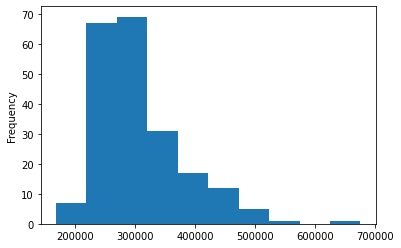

In [ ]:
sales_df['Sales_Price'].plot(kind='hist')   #Simple Histogram
plt.show()

### That previous histogram provides information about the distribution of sales prices. However, if we want to use it for a report, it is probably better if we customize it to make more readible and visually appealing.

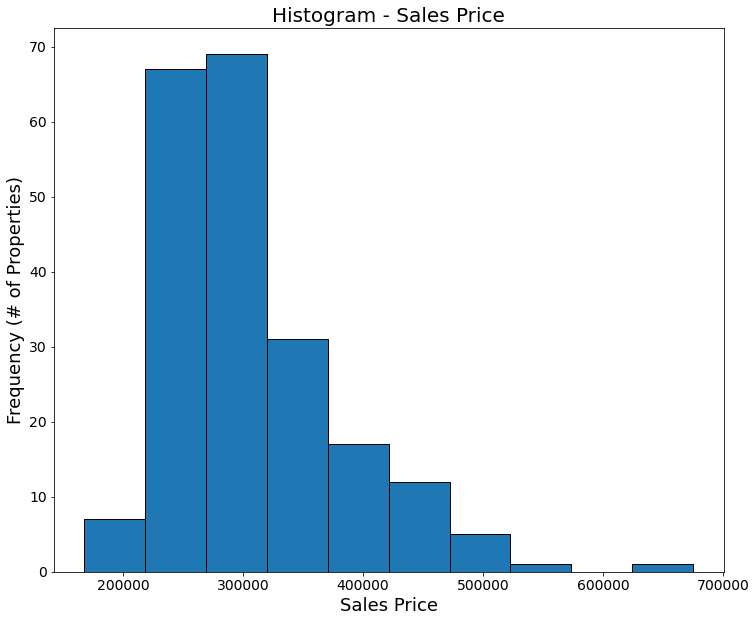

In [ ]:
sales_df['Sales_Price'].plot(kind='hist', figsize=(12,10), edgecolor='black', linewidth=1) 
plt.title('Histogram - Sales Price',fontsize=20)
plt.xlabel('Sales Price',fontsize=18)
plt.ylabel('Frequency (# of Properties)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Histograms are highly customizable. Read the library documentation to learn more about this and other visualizations with matplotlib (https://matplotlib.org)

### Another histogram. Now we are going to visualize "GLA".
### We are also going to try a different color (lightblue).

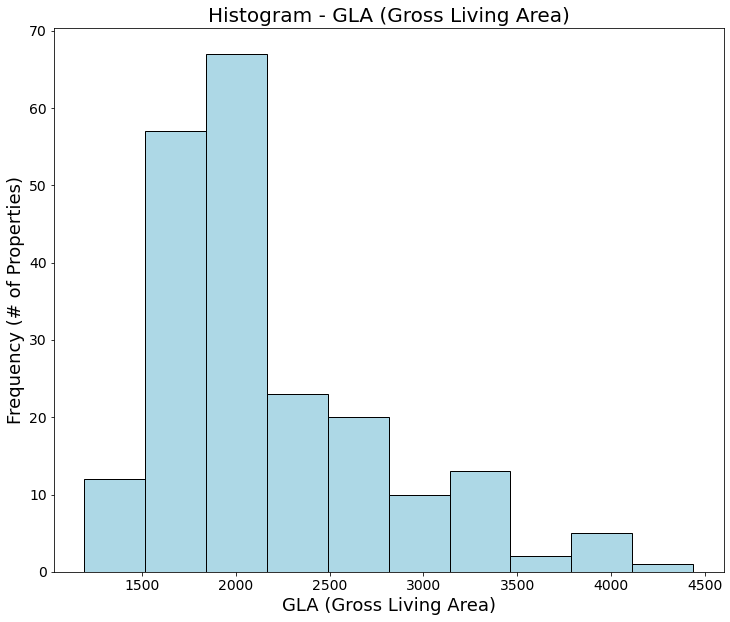

In [ ]:
sales_df['GLA'].plot(kind='hist', figsize=(12,10),color='lightblue',edgecolor='black', linewidth=1)
plt.title('Histogram - GLA (Gross Living Area)',fontsize=20)
plt.xlabel('GLA (Gross Living Area)',fontsize=18)
plt.ylabel('Frequency (# of Properties)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


### One more histogram to visualize 'Age'. Different color (darkseagreen)

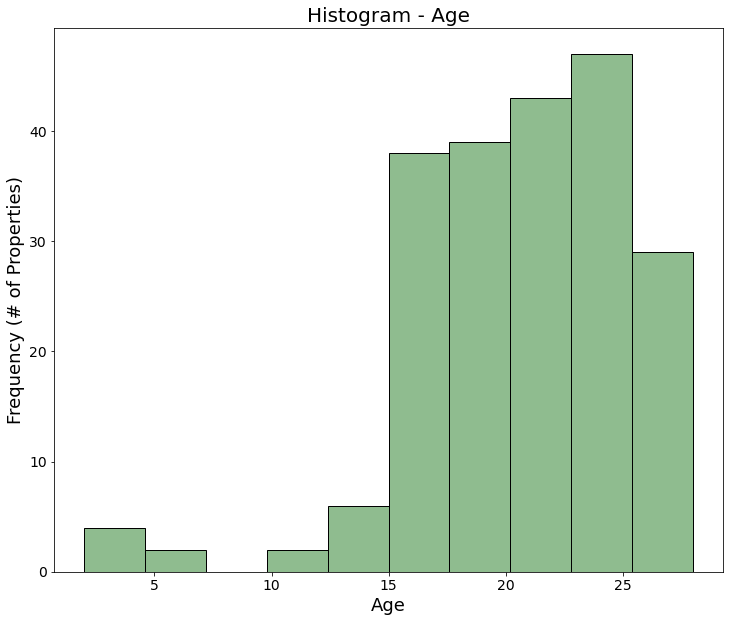

In [ ]:
sales_df['Age'].plot(kind='hist',figsize=(12,10),color='darkseagreen',edgecolor='black', linewidth=1)
plt.title('Histogram - Age',fontsize=20)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Frequency (# of Properties)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


### Next, we are going to use one of the favorite visualizations among residential appraisers, the scatterplot of GLA and Sales Price. (We will be using the seaborn library. For more information read the documentation at https://seaborn.pydata.org/)

The

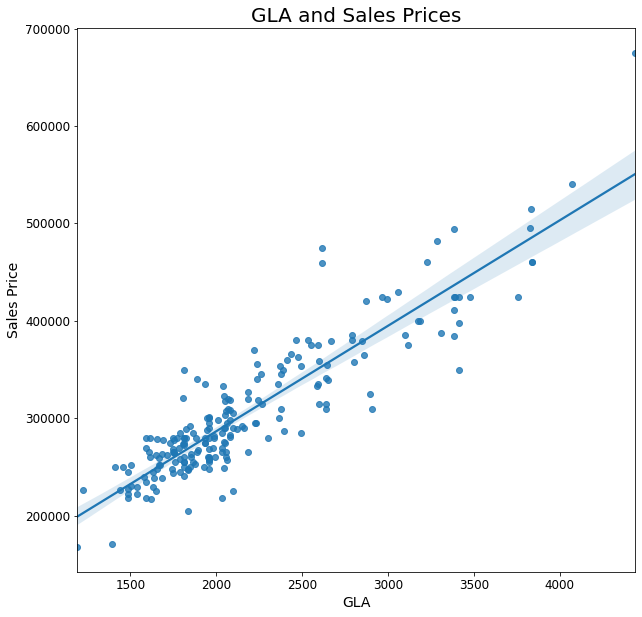

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x='GLA', y='Sales_Price', data=sales_df)
plt.title('GLA and Sales Prices',fontsize=20)
plt.xlabel('GLA',fontsize=14)
plt.ylabel('Sales Price',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Now a scatterplot of Site and Sales Price.

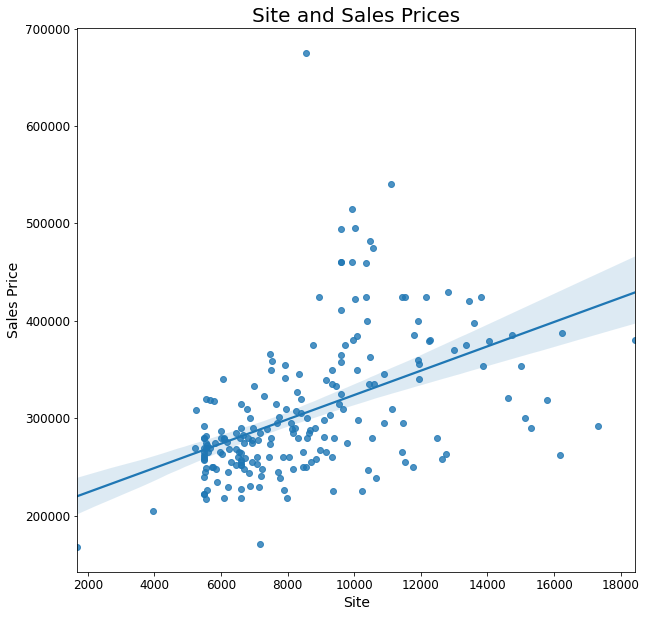

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x='Site', y='Sales_Price', data=sales_df)
plt.title('Site and Sales Prices',fontsize=20)
plt.xlabel('Site',fontsize=14)
plt.ylabel('Sales Price',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.show()

### A great visualization to show the correlation between features (correlation matrix) is the heatmap.

### Quick look at the correlation matrix

In [ ]:
sales_df.corr()     #Run correlation matrix

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Fireplace,Pool,Sales_Price
Site,1.000000,-0.250851,-0.047395,0.377349,0.396751,0.466039,0.057883,0.124235,0.357358,0.485549
View,-0.250851,1.000000,-0.037876,0.024390,0.076089,-0.006968,-0.035697,0.150430,0.033979,0.064961
Age,-0.047395,-0.037876,1.000000,-0.313767,-0.412013,-0.472071,0.001644,0.206450,0.114419,-0.425663
Bedrooms,0.377349,0.024390,-0.313767,1.000000,0.644415,0.712319,0.042926,0.100129,0.283967,0.668227
Bathrooms,0.396751,0.076089,-0.412013,0.644415,1.000000,0.835726,0.072859,0.162889,0.237168,0.789761
GLA,0.466039,-0.006968,-0.472071,0.712319,0.835726,1.000000,-0.012028,0.121182,0.269489,0.903643
Garage,0.057883,-0.035697,0.001644,0.042926,0.072859,-0.012028,1.000000,-0.026790,-0.045061,-0.012330
Fireplace,0.124235,0.150430,0.206450,0.100129,0.162889,0.121182,-0.026790,1.000000,0.277564,0.168883
Pool,0.357358,0.033979,0.114419,0.283967,0.237168,0.269489,-0.045061,0.277564,1.000000,0.412499
Sales_Price,0.485549,0.064961,-0.425663,0.668227,0.789761,0.903643,-0.012330,0.168883,0.412499,1.000000


### Use a heatmap to visualize the correlation matrix.

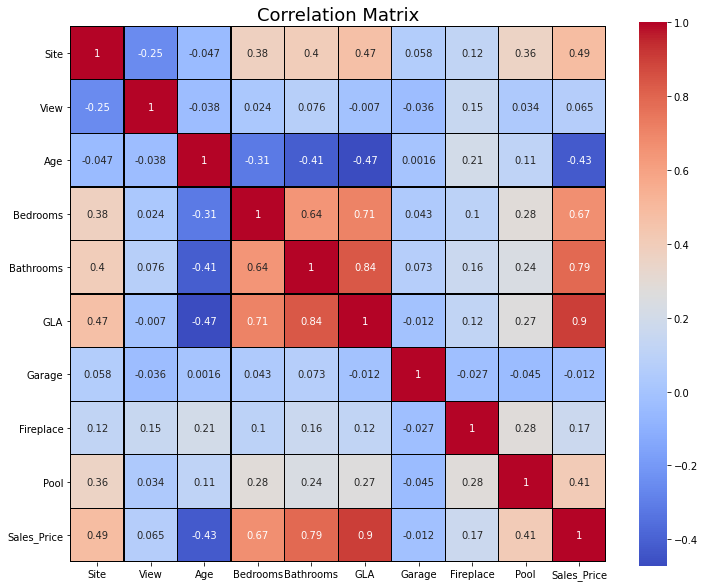

In [ ]:
plt.figure(figsize=(12,10))

sns.heatmap(sales_df.corr(),linewidths = 0.25,square = True,cmap = 'coolwarm',linecolor = 'black',annot= True);

plt.title("Correlation Matrix",fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


### The previous visualizations are only a few of the many kinds of visualizations that can be used to explore a dataset. To learn more about the matplotlib and seaborn libraries please refer to the documentation. 
### It is time to start working on the regression models (Linear Regression and Decision Tree Regression).


# **MODELS**

### Import the libraries we are going to be using.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

### Before running the linear regression and the decision tree regression we must define the predicting features (Site, View, Age, Bedrooms, Bathrooms, GLA, Garage, Fireplace, and Pool) as 'X' and the target feature (Sales Prices) as 'y'.

In [ ]:
X = sales_df.iloc[:,:-1]      #Define predicting features, X
y = sales_df.iloc[:,-1]       #Define target, y

### Now we split the dataframe in two sets. The train set, to fit the model, and the test set, to test the model with new data.
### We assign 80% of the data to the train set and 20% to the test set. (Other common combinations are 75/25, 85/15, and 90/10).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.2, random_state=0)     #train-test split

### Define the linear regression model and fit the train set.

### **MODEL: Linear Regression**

In [ ]:
lin_regressor = LinearRegression()        #Define the model

lin_regressor.fit(X_train,y_train)        #Fit the train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### We just created the Linear Regression model. Now we want to know how well it performs with new data (test set). We will use "Mean Absolute Error" (MAE) to score the model.

In [ ]:
lin_pred = lin_regressor.predict(X_test)                                 #Get predictions using the test set

lin_mae = mean_absolute_error(lin_pred,y_test)                           #Calculate MAE

print('Linear Regression\nMean Absolute Error (MAE):', format(lin_mae, ',.2f'))    #Display MAE score

Linear Regression
Mean Absolute Error (MAE): 17,980.19


###Next, we can work on the Decision Tree Regression model.

## **MODEL : Decision Tree**

###Define the Decision Tree model and fit the train set.

In [ ]:
decision_tree = DecisionTreeRegressor()     #Define the model
 
decision_tree.fit(X_train,y_train)          #Fit the train set

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### We just created the Decision Tree Regression model. Now we want to know how well it performs with new data (test set). We will use "Mean Absolute Error" (MAE) to score the model.

In [ ]:
dt_pred = decision_tree.predict(X_test)       #Get predictions using the test set

dt_mae = mean_absolute_error(dt_pred,y_test)  #Calculate MAE

print('Decision Tree\nMean Absolute Error (MAE):', format(dt_mae, ',.2f'))    #Display MAE score


Decision Tree
Mean Absolute Error (MAE): 30,763.95


## Based on the MAE scores it appears that the *Linear Regression* model is a better fit for our dataset.

##We can now run both of the trained models using the subject property. 

## **PREDICTIONS**

### Import a csv file that contains the subject's information in the same format as the cleaned dataframe. The only missing feature is the "Sales Price" since that is the target we are trying to predict.

In [ ]:
sp_data_path = '/content/SP_Data.csv'           #Create file path to csv dataset 
sp_data = pd.read_csv(sp_data_path)             #Read dataset in dataframe

sp_data.head()                                  #Display data (first 5 rows) just to make sure it was successfully imported

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Fireplace,Pool
0,12100,0,16,4,3,2915,3,0,1


###First we define the predicting features and then we are run the trained models to predict the subject's value.

In [ ]:
features = ['Site', 'View', 'Age', 'Bedrooms', 'Bathrooms', 'GLA','Garage','Fireplace','Pool']    #Define predicting features
sp_X = sp_data[features]

prediction_linear = int(lin_regressor.predict(sp_X))                    #Predict the subject's value using Linear Regresion model
prediction_decision_tree = int(decision_tree.predict(sp_X))             #Predict the subject's value using Decision Tree Regresion model

print('Estimated Values')                                               #Display estimated values
print()
print('Linear Regression: $', format(prediction_linear,','))
print('Decision Tree Regression: $', format(prediction_decision_tree,','))

Estimated Values

Linear Regression: $ 403,911
Decision Tree Regression: $ 420,000


### Subject's estimated value:
### 1) Based on Linear Regression is \$403,911
### 2) Based on Decision Tree Regression is \$420,000

### **What to do with the results?**

### We were able to run a couple of regression models that predicted a property value with reasonable accuracy. However, the fact that our models produced these results doesn’t mean that we must use them to derive a final estimate of value. Perhaps we just want them as extra tool to support our own analysis. Or maybe we do want to use them for low-risk collateral analysis. The point is that we should always keep in mind that machine learning is just a tool, we are ultimately in charge of making the decision to use it or not use it. 

### **Conclusion**
### In this tutorial we covered data collection, data wrangling/cleaning, visualizations, data modelling, and prediction of values. The process may seem lengthy the first time, but now it is all done and our code is saved in a notebook. We can run it and predict property values as many times as we want, in a matter of seconds.

### **What’s next?** 
### Hopefully now you have a better idea of what it takes to run a (basic) prediction model. But, there is a lot more about data analysis and machine learning than what we covered in this tutorial. Next, you can explore more data visualizations, optimizations, learn about feature engineering, or have fun with deep learning. Go explore the vast world of machine learning and Level Up!!
